In [1]:
import pandas as pd

In [2]:
# read csv file
data = pd.read_csv('Students_Cleaned_Encoded.csv')

In [3]:
# top 5
data.head()

,Year_of_Study,Daily_Usage_Hours,Trust_in_AI_Tools,Impact_on_Grades,Awareness_Level,uses_coding_help,uses_assignments,uses_project_work,uses_mcq_practice,uses_exam_preparation,...,preferred_ai_tool_Gemini,preferred_ai_tool_Other,device_used_Laptop,device_used_Mobile,device_used_Tablet,internet_access_High,internet_access_Medium,internet_access_Poor,Do_Professors_Allow_Use_encoded,Willing_to_Pay_for_Access_encoded
0,4,0.9,2,2,9,1,1,0,0,0,...,0,0,0,1,0,0,0,1,0,1
1,2,3.4,3,-3,6,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,0
2,2,3.6,5,0,1,0,0,1,1,0,...,1,0,0,0,1,0,0,1,0,0
3,2,2.9,5,2,5,0,0,0,0,0,...,1,0,1,0,0,1,0,0,1,0
4,1,0.9,1,3,8,0,0,0,0,0,...,0,1,1,0,0,0,1,0,1,1


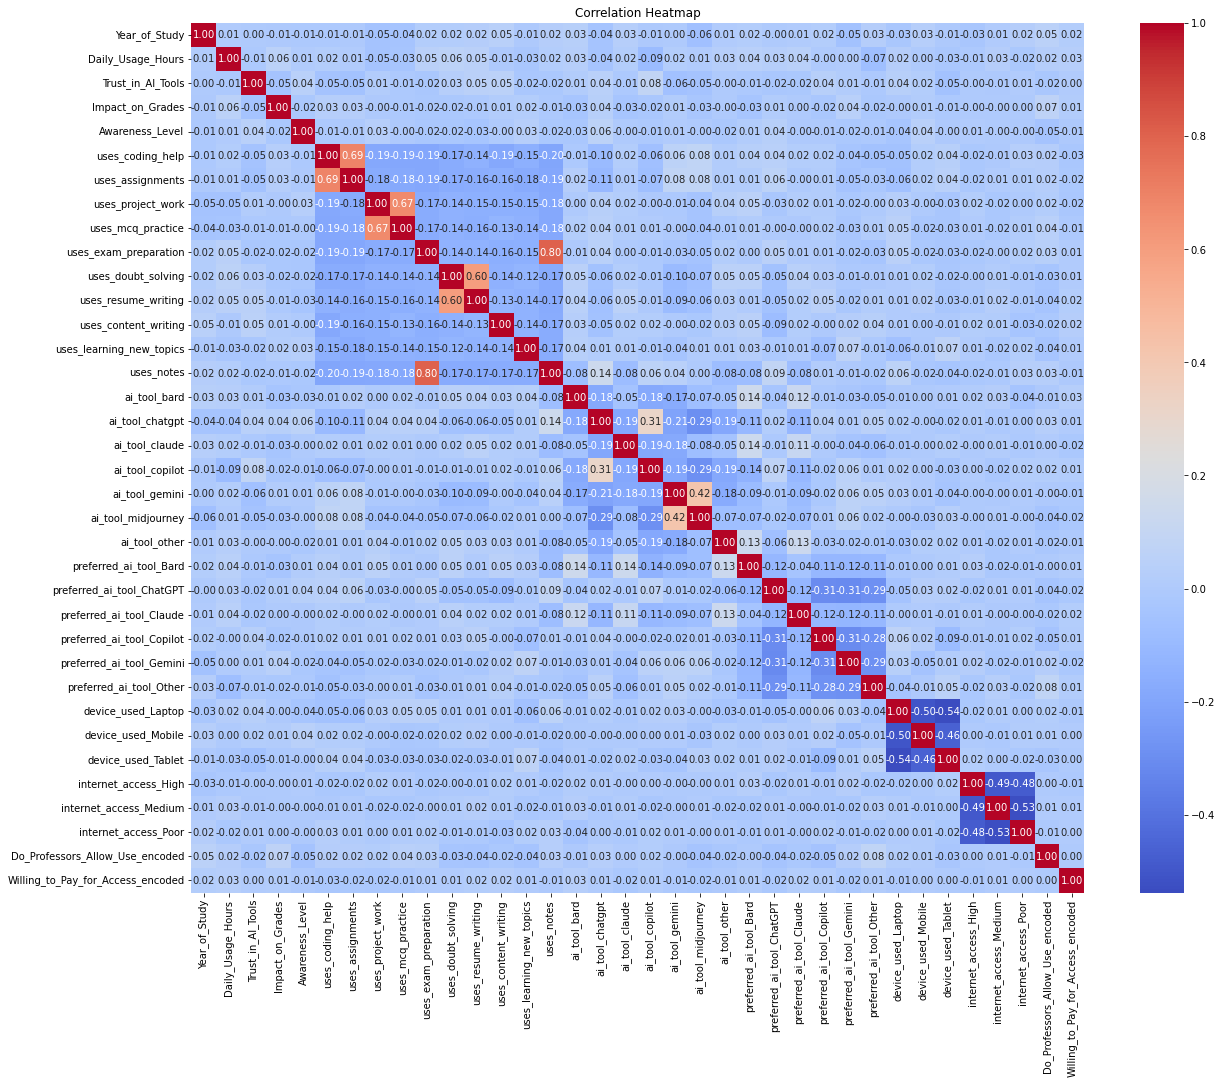

In [5]:
# draw a correlation heatmap
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 16))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.show()


# Daily_Usage_Hours

In [6]:
# column names
data.columns

Index(['Year_of_Study', 'Daily_Usage_Hours', 'Trust_in_AI_Tools',
       'Impact_on_Grades', 'Awareness_Level', 'uses_coding_help',
       'uses_assignments', 'uses_project_work', 'uses_mcq_practice',
       'uses_exam_preparation', 'uses_doubt_solving', 'uses_resume_writing',
       'uses_content_writing', 'uses_learning_new_topics', 'uses_notes',
       'ai_tool_bard', 'ai_tool_chatgpt', 'ai_tool_claude', 'ai_tool_copilot',
       'ai_tool_gemini', 'ai_tool_midjourney', 'ai_tool_other',
       'preferred_ai_tool_Bard', 'preferred_ai_tool_ChatGPT',
       'preferred_ai_tool_Claude', 'preferred_ai_tool_Copilot',
       'preferred_ai_tool_Gemini', 'preferred_ai_tool_Other',
       'device_used_Laptop', 'device_used_Mobile', 'device_used_Tablet',
       'internet_access_High', 'internet_access_Medium',
       'internet_access_Poor', 'Do_Professors_Allow_Use_encoded',
       'Willing_to_Pay_for_Access_encoded'],
      dtype='object')

In [7]:
# Analyze target variable characteristics
def analyze_target_candidates(data):
    """Analyze potential target variables"""
    
    targets = ['Daily_Usage_Hours', 'Trust_in_AI_Tools', 'Impact_on_Grades', 
               'Awareness_Level', 'Do_Professors_Allow_Use_encoded', 
               'Willing_to_Pay_for_Access_encoded']
    
    print("=== TARGET VARIABLE ANALYSIS ===\n")
    
    for target in targets:
        if target in data.columns:
            print(f"📊 {target}:")
            print(f"   Type: {'Continuous' if data[target].nunique() > 10 else 'Categorical'}")
            print(f"   Unique values: {data[target].nunique()}")
            print(f"   Range: {data[target].min()} to {data[target].max()}")
            print(f"   Missing values: {data[target].isnull().sum()}")
            
            # Show distribution
            print(f"   Distribution:")
            value_counts = data[target].value_counts().head(5)
            for value, count in value_counts.items():
                print(f"     {value}: {count} ({count/len(data)*100:.1f}%)")
            print()

# Run the analysis
analyze_target_candidates(data)

=== TARGET VARIABLE ANALYSIS ===

📊 Daily_Usage_Hours:
   Type: Continuous
   Unique values: 46
   Range: 0.5 to 5.0
   Missing values: 0
   Distribution:
     4.1: 135 (3.7%)
     1.9: 119 (3.3%)
     3.1: 118 (3.3%)
     0.8: 114 (3.2%)
     3.2: 113 (3.1%)

📊 Trust_in_AI_Tools:
   Type: Categorical
   Unique values: 5
   Range: 1 to 5
   Missing values: 0
   Distribution:
     5: 797 (22.1%)
     2: 750 (20.8%)
     1: 714 (19.8%)
     3: 685 (19.0%)
     4: 668 (18.5%)

📊 Impact_on_Grades:
   Type: Continuous
   Unique values: 11
   Range: -5 to 5
   Missing values: 0
   Distribution:
     2: 523 (14.5%)
     1: 477 (13.2%)
     0: 465 (12.9%)
     -3: 463 (12.8%)
     -1: 446 (12.3%)

📊 Awareness_Level:
   Type: Categorical
   Unique values: 10
   Range: 1 to 10
   Missing values: 0
   Distribution:
     9: 463 (12.8%)
     10: 435 (12.0%)
     7: 385 (10.7%)
     8: 376 (10.4%)
     3: 362 (10.0%)

📊 Do_Professors_Allow_Use_encoded:
   Type: Categorical
   Unique values: 2
   Ran

In [8]:
# Find target with strongest predictor relationships
def find_best_target_by_correlation(data):
    """Find target with strongest correlations to other features"""
    
    potential_targets = ['Daily_Usage_Hours', 'Trust_in_AI_Tools', 'Impact_on_Grades', 
                        'Awareness_Level', 'Do_Professors_Allow_Use_encoded', 
                        'Willing_to_Pay_for_Access_encoded']
    
    target_correlation_strength = {}
    
    for target in potential_targets:
        if target in data.columns:
            # Get correlations with all other features
            other_features = [col for col in data.columns if col != target]
            correlations = data[other_features].corrwith(data[target]).abs()
            
            # Calculate average correlation strength
            avg_correlation = correlations.mean()
            max_correlation = correlations.max()
            features_with_strong_corr = (correlations > 0.1).sum()
            
            target_correlation_strength[target] = {
                'avg_correlation': avg_correlation,
                'max_correlation': max_correlation,
                'strong_correlations_count': features_with_strong_corr
            }
    
    # Sort by average correlation strength
    sorted_targets = sorted(target_correlation_strength.items(), 
                           key=lambda x: x[1]['avg_correlation'], reverse=True)
    
    print("=== TARGET SELECTION BY CORRELATION STRENGTH ===\n")
    print("Targets ranked by predictive potential:")
    
    for i, (target, stats) in enumerate(sorted_targets, 1):
        print(f"{i}. {target}")
        print(f"   Average correlation: {stats['avg_correlation']:.4f}")
        print(f"   Max correlation: {stats['max_correlation']:.4f}")
        print(f"   Features with >0.1 correlation: {stats['strong_correlations_count']}")
        print()
    
    return sorted_targets[0][0]  # Return best target

# Find the best target
best_target = find_best_target_by_correlation(data)
print(f"🎯 Recommended target: {best_target}")

=== TARGET SELECTION BY CORRELATION STRENGTH ===

Targets ranked by predictive potential:
1. Daily_Usage_Hours
   Average correlation: 0.0284
   Max correlation: 0.0916
   Features with >0.1 correlation: 0

2. Trust_in_AI_Tools
   Average correlation: 0.0269
   Max correlation: 0.0834
   Features with >0.1 correlation: 0

3. Do_Professors_Allow_Use_encoded
   Average correlation: 0.0265
   Max correlation: 0.0777
   Features with >0.1 correlation: 0

4. Impact_on_Grades
   Average correlation: 0.0198
   Max correlation: 0.0676
   Features with >0.1 correlation: 0

5. Awareness_Level
   Average correlation: 0.0174
   Max correlation: 0.0577
   Features with >0.1 correlation: 0

6. Willing_to_Pay_for_Access_encoded
   Average correlation: 0.0124
   Max correlation: 0.0295
   Features with >0.1 correlation: 0

🎯 Recommended target: Daily_Usage_Hours
